Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 784)               0         
                                                                 
 dense_91 (Dense)            (None, 2048)              1607680   
                                                                 
 dropout_60 (Dropout)        (None, 2048)              0         
                                                                 
 dense_92 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_61 (Dropout)        (None, 1024)              0         
                                                                 
 dense_93 (Dense)            (None, 10)                10250     
                                                                 
Total params: 3716106 (14.18 MB)
Trainable params: 37

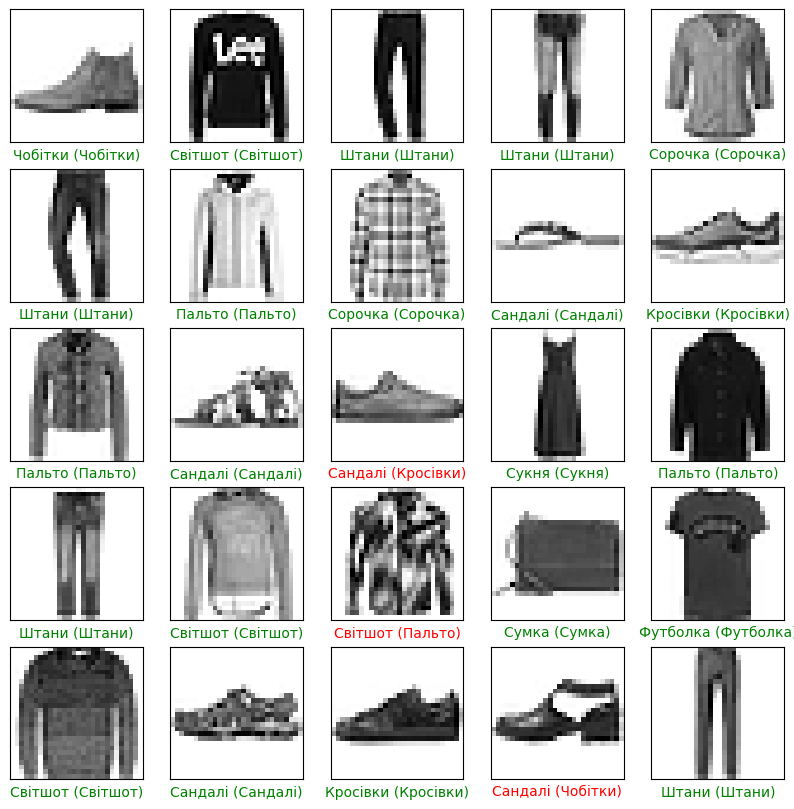

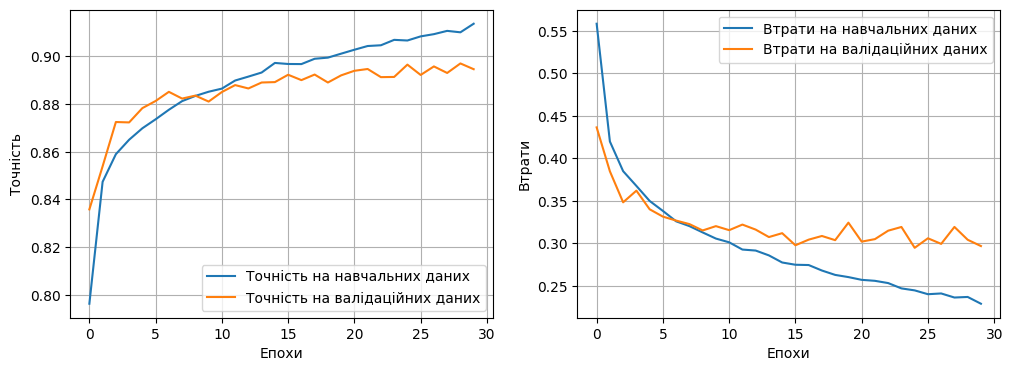

313/313 [==============================] - 4s 12ms/step - loss: 0.3410 - accuracy: 0.8860
Точність на тестовому наборі даних: 88.60%


In [34]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Завантаження та підготовка даних
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Нормалізація даних
train_images, test_images = train_images / 255.0, test_images / 255.0

# Створення моделі нейронної мережі
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Вхідний шар (розгортання зображення)
    layers.Dense(2048, activation='relu'),  # Додатковий прихований шар з 512 нейронами та ReLU
    layers.Dropout(0.4),  # Dropout для регуляризації
    layers.Dense(1024, activation='relu'),  # Прихований шар з 1024 нейронами та функцією активації ReLU
    layers.Dropout(0.4),  # Dropout для регуляризації

    layers.Dense(10, activation='softmax')  # Вихідний шар з функцією активації softmax для класифікації
])

# Додавання ранньої зупинки (Early Stopping)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

# Змінення оптимізатора на Adam
custom_optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Компіляція моделі з оптимізатором Adam
model.compile(optimizer=custom_optimizer,  # Використовуємо оптимізатор Adam
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Вивід інформації про модель
model.summary()

# Збільшення кількості епох
history = model.fit(train_images, train_labels, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Відображення прикладів тестових зображень та їхніх прогнозованих класів
test_predictions = model.predict(test_images)
class_names = ["Футболка", "Штани", "Світшот", "Сукня", "Пальто", "Сандалі", "Сорочка", "Кросівки", "Сумка", "Чобітки"]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(test_predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

# Відображення графіків навчання
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність на навчальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційних даних')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрати на навчальних даних')
plt.plot(history.history['val_loss'], label='Втрати на валідаційних даних')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.grid(True)

plt.show()

# Оцінка точності на тестовому наборі даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Точність на тестовому наборі даних: {test_acc * 100:.2f}%")
